In [1]:
import pandas as pd
import scipy
%matplotlib inline

#"Rank","Ratings","ResearchOverhead","BasePay","TuitionOutState","GradStudents","TTFaculty","Lecturers","G_TTRatio","G_TTLRatio"
def plotter(df,column1,column2):
    return df.plot.scatter(x=column1, y=column2, style='o')

ImportError: cannot import name NUMPY_MKL

In [ ]:
EXCEL_LOCATION = "University data.xlsx"
df = pd.read_excel(EXCEL_LOCATION)
df.columns = ["Rank","Name","Ratings","ResearchOverhead","BasePay","TuitionOutState","GradStudents","TTFaculty","Lecturers","G_TTRatio","G_TTLRatio"]

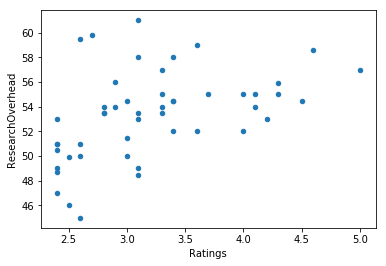

In [96]:
plotter(df[['Ratings',"ResearchOverhead"]],"Ratings","ResearchOverhead")

In [97]:
#Rank
#Ratings
#ResearchOverhead
#BasePay
#TuitionOutState
#GradStudents
#TTFaculty
#Lecturers
#G_TTRatio
#G_TTLRatio

In [81]:
import numpy

In [82]:
#CS Score (USNews)
sigma1 = numpy.mean(df["Ratings"])
#Research Overhead
sigma2 = numpy.mean(df["ResearchOverhead"])
#Admin Base Pay
sigma2 = numpy.mean(df["BasePay"])
#Tuition Out State
sigma2 = numpy.mean(df["TuitionOutState"])

In [83]:
#CS Score (USNews)
var1 = numpy.var(df["Ratings"])
#Research Overhead
var2 = numpy.var(df["ResearchOverhead"])
#Admin Base Pay
var3 = numpy.var(df["BasePay"])
#Tuition Out State
var4 = numpy.var(df["TuitionOutState"])

In [84]:
#CS Score (USNews)
std1 = numpy.std(df["Ratings"])
#Research Overhead
std2 = numpy.std(df["ResearchOverhead"])
#Admin Base Pay
std3 = numpy.std(df["BasePay"])
#Tuition Out State
std4 = numpy.std(df["TuitionOutState"])

In [87]:
?numpy.cov()

In [90]:
numpy.cov(df[["Ratings","ResearchOverhead"]].as_matrix())
#df[["Ratings","ResearchOverhead"]].as_matrix()

array([[ 1352.  ,  1404.  ,  1300.  , ...,  1315.6 ,  1263.6 ,      nan],
       [ 1404.  ,  1458.  ,  1350.  , ...,  1366.2 ,  1312.2 ,      nan],
       [ 1300.  ,  1350.  ,  1250.  , ...,  1265.  ,  1215.  ,      nan],
       ..., 
       [ 1315.6 ,  1366.2 ,  1265.  , ...,  1280.18,  1229.58,      nan],
       [ 1263.6 ,  1312.2 ,  1215.  , ...,  1229.58,  1180.98,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]])